In [1]:
# -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import scipy.optimize
%matplotlib widget

# Plot reference 
0. Fit the data point with a double exponential decay curve [https://stackoverflow.com/questions/30356619/how-to-fit-a-two-term-exponential-in-python ]
1. Setting a relative frequency in a matplotlib histogram [https://stackoverflow.com/questions/9767241/setting-a-relative-frequency-in-a-matplotlib-histogram]
2. Bin size in Matplotlib (Histogram) [https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram]
3. logscale axis [https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python]
4. binwidth for histogram Using the The Freedman-Diaconis Rules to calculate the binwidth: The bin-width is set to h=2×IQR×n^(−1/3),the number of bins is (max−min)/h; where IQR is the interquartile range of the data and n is the number of observations in the sample [https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram]
5. Alternatively, The simplest method is to set the number of bins equal to the square root of the number of values you are binning.
6. Generate random numbers from exponential distribution [https://stackoverflow.com/questions/47319277/generate-random-numbers-from-exponential-distribution-and-model-using-python]
7. error band plot [https://stackoverflow.com/questions/55368485/draw-error-shading-bands-on-line-plot-python?noredirect=1&lq=1]

In [4]:
# read and plot the trajectory analysis data from Kymotracker
# trace_name = input('please type in the file name:' ) + '.xlsx'
# trace_path = input('please type in the file path:')
# trace_file = os.path.join(trace_path, trace_name) 
trace_file = input('please type in the file name:' )

please type in the file name: /Volumes/GoogleDrive/My Drive/T7 gp2.5 MS_2021/Data&CodeRepository/photobleeching_first150s/photobleeching_correction_anlyzed150s.xlsx


In [9]:
trace = pd.read_excel(trace_file,sheet_name='6pN_6ms')
print(trace.head())
duration = trace['dt_ms']/1000
data = duration.dropna()
print(data)

   dt_ms
0    585
1    585
2   1170
3    585
4    585
0       0.585
1       0.585
2       1.170
3       0.585
4       0.585
        ...  
1188    0.584
1189    0.588
1190    0.588
1191    0.588
1192    0.588
Name: dt_ms, Length: 1193, dtype: float64


In [4]:
a = round(np.min(data),2)
print(a)

0.95


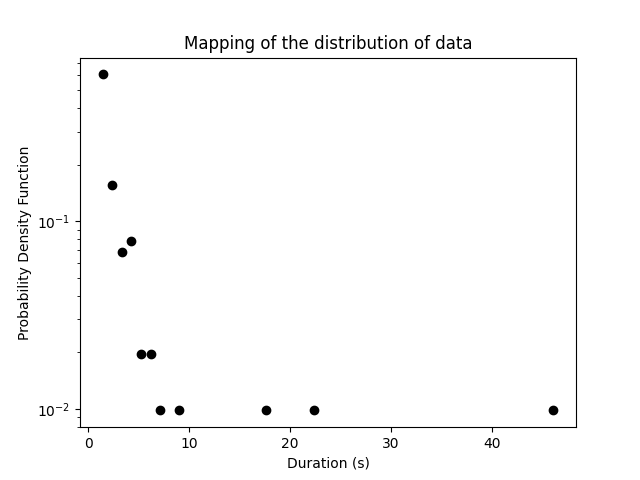

In [5]:
#calculate interquartile range and subsequent binwidth, and then histogram
# q3, q1 = np.percentile(data, [75 ,25])
# iqr = q3 - q1
# binwidth = (2* iqr) * len(data) ** (-1/3)
# print(binwidth)
binwidth = round(np.min(data),2)
# binwidth = 1

ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), weights=np.zeros_like(data) + 1. / data.size)
xdata = base[:-1] + 0.5*binwidth

plt.figure()
plt.scatter(xdata, ydata, color="k")
plt.yscale('log')
# plt.ylim(0.001,1)
# plt.xlim(0,18)
plt.ylabel('Probability Density Function')
plt.xlabel('Duration (s)')
plt.title('Mapping of the distribution of data')
plt.show()
# plt.savefig(trace_file[:-18]+ 'Mapping of the distribution of data' +'.png', dpi=300)
# plt.savefig(trace_file[:-5]+ '_Mapping of the distribution of data' +'.png', dpi=300)

In [8]:
x1 = xdata
y1 = ydata

In [13]:
x2 = xdata
y2 = ydata

In [17]:
# Save all the analyzed data in an excel file and the analysis log 
# excel_filename = kymo_path[:-10] + 'cycle' + kymo_cycle + "-correlated_data" + '.xlsx'
# no idea why it causes errors without this step
writer = pd.ExcelWriter(trace_file)

data1 = {'duration/s':x1,
        'pdf':y1}
data2 = {'duration/s':x2,
         'pdf':y2}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df1.to_excel(writer,sheet_name ='6pN_6ms_pdf')
df2.to_excel(writer,sheet_name ='6pN_1000ms_pdf')

writer.save()

In [6]:
# this step is to fit the data in a specific range
xdata1 = xdata[np.where(xdata<30)]
ydata1 = ydata[np.where(xdata<30)]

[3.13738749e+01 1.02620965e+00 2.13356440e-01 1.47441439e-01
 1.12178815e-02 5.66033788e-01]
R² = 0.9962377740262446


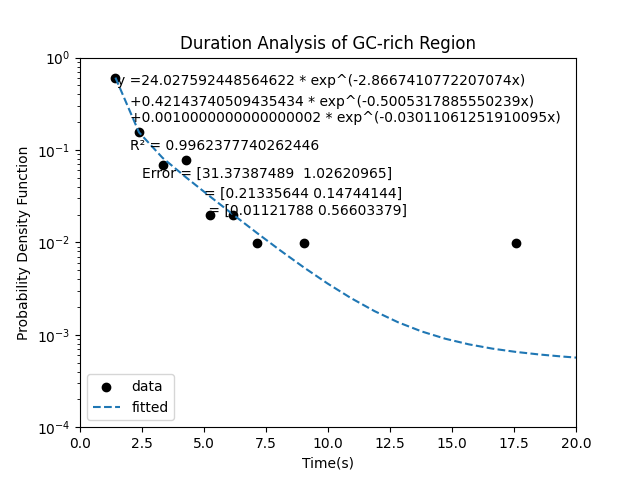

In [7]:
# fit the data with a monoExponential decay curve
def TripleExp(x, a1,k1,a2,k2,a3,k3):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)+ a3 * np.exp(-k3 * x)

# perform the fit
# Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit

# popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,maxfev=50000)
# popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,p0=(100,5,5,0.1,0.1,0.1),maxfev=50000)

# #for AT
popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((10, 1, 0.1, 0.01,0.001,0.01), (100,10, 1, 1,0.01,0.05)),maxfev=50000)

# for GC
# popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((1, 1, 0.1, 0.1,0.001,0.01), (50, 10, 1, 1.5,0.05,0.5)),maxfev=50000)

# a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
a1, k1, a2,k2,a3,k3 = popt
perr = np.sqrt(np.diag(pcov))
print(perr)

# determine quality of the fit
squaredDiffs = np.square(ydata1 - TripleExp(xdata1, a1, k1,a2,k2,a3,k3))
squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# # plot extroplating fitted curve
# xdata2 = np.arange(0,10,0.1)
# ydata2 = monoExp(xdata2, a, k)/a

# plot the results
plt.figure()
plt.scatter(xdata1, ydata1, color="k", label="data")
plt.plot(xdata1, TripleExp(xdata1, a1, k1,a2,k2,a3,k3), '--', label="fitted")
# plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

plt.text(1.5,0.5,'y =' + str(a1) + ' * exp^('+ str(-k1)+'x)')
plt.text(2,0.3,'+' +str(a2) + ' * exp^('+ str(-k2)+'x)')
plt.text(2,0.2,'+' +str(a3) + ' * exp^('+ str(-k3)+'x)')
plt.text(2,0.1,'R² = ' + str(rSquared))
plt.text(2.5,0.05,'Error = ' + str(perr[:2]))
plt.text(5,0.03,'= ' + str(perr[2:4]))
plt.text(5,0.02,' = ' + str(perr[4:6]))

plt.yscale('log')
plt.ylim(0.0001,1)
plt.xlim(0,20)
plt.legend(loc = 'lower left')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
plt.title("Duration Analysis of GC-rich Region")
plt.show()
plt.tight_layout()

In [101]:
pasuse

NameError: name 'pasuse' is not defined

In [8]:
# random sampling
resampling_ratio = 0.7
resampling_times = 1000

# fit the data with a TriExponential decay curve
def TripleExp(x, a1,k1,a2,k2,a3,k3):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)+ a3 * np.exp(-k3 * x)

# define a function to compute the decay constant from an exponential decay fit, with return of decay constant
def ExoDecFit (data):
    #calculate interquartile range and subsequent binwidth, and then histogram
    binwidth = round(np.min(data),2)
    # binwidth = 1
    ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), weights=np.zeros_like(data) + 1. / data.size)
    xdata = base[:-1] + 0.5*binwidth
    
    xdata1 = xdata[np.where(xdata<100)]
    ydata1 = ydata[np.where(xdata<100)]

    # perform the fit
    # Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit
    try:
    # perform the fit
    # Here you give the range of parameters for a,b,c which Python then iterates over to find the best fit
        # popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((10, 1, 0.1, 0.1,0.0001,0.01), (50, 10, 1, 1.5,0.05,0.5)),maxfev=50000)
        
        # for AT/GC analysis
        popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((10, 1, 0.1, 0.1,0.001,0.01), (50, 10, 1, 1.5,0.05,0.08)),maxfev=50000)
        # popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((1, 1, 0.1, 0.1,0.001,0.01), (50, 10, 1, 1.5,0.05,0.5)),maxfev=50000)
    except RuntimeError:
        pass
    
    # determine quality of the fit
    squaredDiffs = np.square(ydata1 - TripleExp(xdata1, a1, k1,a2,k2,a3,k3))
    squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    return popt
    # if rSquared >= 0.999:
    #     # if popt is not None:
    #     if popt == []:
    #         return popt

fit_res_ls = []
for i in range (resampling_times):
    # random sampling with replacement method,
    data_resampling = np.random.choice(data, size= int(resampling_ratio * len(data)), replace=True)
    fit_res = ExoDecFit(data_resampling)
    fit_res_ls.append(fit_res)
        # return format(np.mean(decay_constant_ls),'.4f'),format (np.std(decay_constant_ls),'.4f')
        
print(len(fit_res_ls))
# print(np.mean(decay_constant_ls))
# print(np.std(decay_constant_ls))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


1000


In [13]:
# compute all the parameters
a1_mean = np.mean(np.array(fit_res_ls)[:,0])
a1_std = np.std(np.array(fit_res_ls)[:,0])
k1_mean = np.mean(np.array(fit_res_ls)[:,1])
k1_std = np.std(np.array(fit_res_ls)[:,1])

a2_mean = np.mean(np.array(fit_res_ls)[:,2])
a2_std = np.std(np.array(fit_res_ls)[:,2])
k2_mean = np.mean(np.array(fit_res_ls)[:,3])
k2_std = np.std(np.array(fit_res_ls)[:,3])

a3_mean = np.mean(np.array(fit_res_ls)[:,4])
a3_std = np.std(np.array(fit_res_ls)[:,4])
k3_mean = np.mean(np.array(fit_res_ls)[:,5])
k3_std = np.std(np.array(fit_res_ls)[:,5])

# save the processing data
result = [a1_mean,a1_std,k1_mean,k1_std,a2_mean,a2_std,k2_mean,k2_std,a3_mean,a3_std,k3_mean,k3_std]
all_population = np.array([np.array(fit_res_ls)[:,0],np.array(fit_res_ls)[:,1],np.array(fit_res_ls)[:,2],np.array(fit_res_ls)[:,3],np.array(fit_res_ls)[:,4],np.array(fit_res_ls)[:,5]]).T
print(result)
np.savetxt('test_to_be_deleted' + '.txt', result, delimiter=',')
# np.savetxt(trace_file[:-19]+ '_koff fit from GC' + '.txt', result, delimiter=',')
# np.savetxt(trace_file[:-17]+ 'all population from low bleeching condition' + '.txt', all_population, delimiter=',')

[30.924257288897724, 18.71955733450327, 2.908839471317309, 0.5017833144383387, 0.5006334456949956, 0.3009741493007173, 0.520129445401399, 0.1837837784036026, 0.0025972092088053685, 0.0056090443594795794, 0.046783432321923585, 0.034472775821022664]


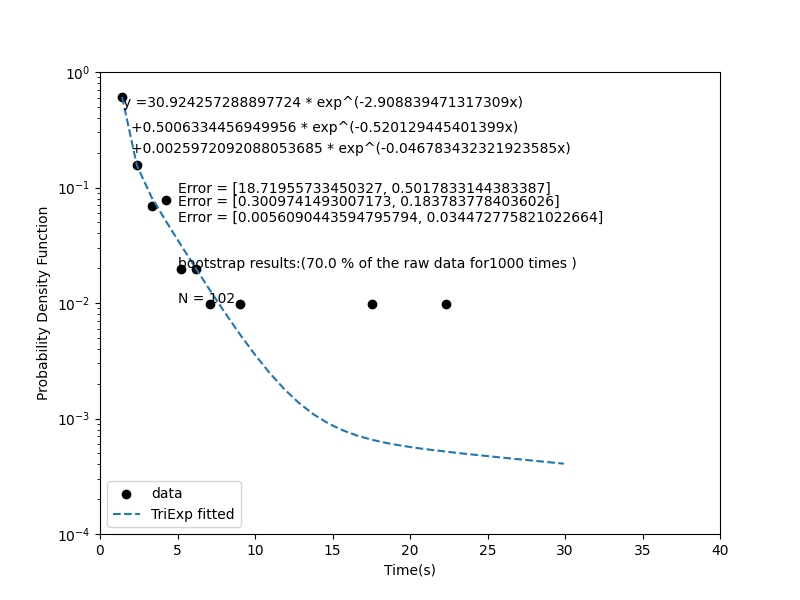

In [10]:
# plot the results
plt.figure(figsize = (8,6))
plt.scatter(xdata1, ydata1, color="k", label="data")
plt.plot(xdata1, TripleExp(xdata1, a1, k1,a2,k2,a3,k3), '--', label="TriExp fitted")
# plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

plt.text(1.5,0.5,'y =' + str(a1_mean) + ' * exp^('+ str(-k1_mean)+'x)')
plt.text(2,0.3,'+' +str(a2_mean) + ' * exp^('+ str(-k2_mean)+'x)')
plt.text(2,0.2,'+' +str(a3_mean) + ' * exp^('+ str(-k3_mean)+'x)')

plt.text(5,0.09,'Error = ' + str([a1_std,k1_std]))
plt.text(5,0.07,'Error = ' + str([a2_std,k2_std]))
plt.text(5,0.05,'Error = ' + str([a3_std,k3_std]))

plt.text(5,0.02,'bootstrap results:'+ '('+ str(resampling_ratio*100) + ' % of the raw data ' + 'for' + str(resampling_times) + ' times )')
plt.text(5,0.01,'N = ' + str(len(data)))

plt.yscale('log')
plt.ylim(0.0001,1)
plt.xlim(0,40)
plt.legend(loc = 'lower left')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
# plt.title("Duration Analysis of AT")
plt.show()
plt.tight_layout()
# plt.savefig(trace_file[:-17]+ '_koff fit from low bleeching condition' +'.png', dpi=300)

In [ ]:
pause

In [62]:
xdata_6 = xdata1
ydata_6 = ydata1
ydata_6_fit = TripleExp(xdata1, a1, k1,a2,k2,a3,k3)

In [69]:
xdata_1000 = xdata1
ydata_1000 = ydata1
ydata_1000_fit = TripleExp(xdata1, a1, k1,a2,k2,a3,k3)

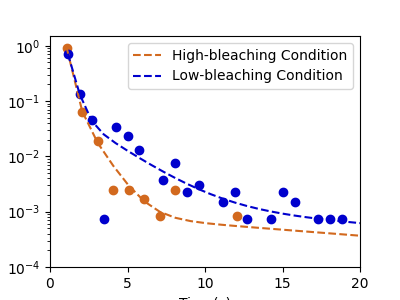

In [70]:
# plot the results
plt.figure(figsize = (4,3))
plt.scatter(xdata_6, ydata_6, color="chocolate")
plt.plot(xdata_6, ydata_6_fit, '--', color="chocolate",label="High-bleaching Condition")

plt.scatter(xdata_1000, ydata_1000, color="mediumblue")
plt.plot(xdata_1000, ydata_1000_fit, '--', color="mediumblue",label="Low-bleaching Condition")

plt.yscale('log')
plt.ylim(0.0001,1.5)
plt.xlim(0,20)
plt.legend(loc = 'upper right')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
# plt.title("Duration Analysis")
plt.show()
plt.tight_layout()
plt.savefig('Fig S2A' + '.png', dpi = 300)

In [ ]:
pause

         k1         k1_type        k2         k2_type        k3  \
0  3.960402  High-bleeching  0.889027  High-bleeching  0.216718   
1  2.309671  High-bleeching  0.440459  High-bleeching  0.108274   
2  2.304545  High-bleeching  0.672829  High-bleeching  0.201094   
3  2.982822  High-bleeching  0.729220  High-bleeching  0.223205   
4  1.898180  High-bleeching  0.354604  High-bleeching  0.055115   

          k3_type  
0  High-bleeching  
1  High-bleeching  
2  High-bleeching  
3  High-bleeching  
4  High-bleeching  


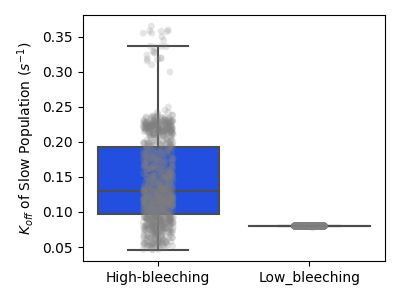

In [76]:
import seaborn as sns
data_bleeching = pd.read_excel(trace_file, sheet_name = "summary")
print(data_bleeching.head())

fig, ax = plt.subplots(figsize = (4,3))
# make grouped boxplot and save it in a variable
sns.boxplot(x="k1_type", y="k3", data=data_bleeching,showfliers = False)
sns.set_palette("bright",20)

# make grouped stripplot and save it in a variable
sns.stripplot(x="k1_type", y="k3", data=data_bleeching,jitter=True,dodge=True, alpha=0.2,color='grey')

ax.set_ylabel("$K_{off}$ of Slow Population ($s^{-1}$)")
# ax.set_ylim(0.95,1.05)
ax.set_xlabel("")
# ax.set_ylim(0.95,1.05)
plt.tight_layout()
plt.show()
# plt.savefig('Fig S2D' +'.png', dpi=300)

In [ ]:
pause

In [ ]:
# fit the data with a fixed value
def TripleExp(x, a2,k2,a3,k3):
    return 47.5 * np.exp(-4.8 * x) + a2 * np.exp(-k2 * x)+ a3 * np.exp(-k3 * x)

# perform the fit
# Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit

popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,p0=(0.15,.66,0.004,0.1),maxfev=50000)
# a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
a2,k2,a3,k3 = popt

# determine quality of the fit
squaredDiffs = np.square(ydata1 - TripleExp(xdata1, a2,k2,a3,k3))
squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# # plot extroplating fitted curve
# xdata2 = np.arange(0,10,0.1)
# ydata2 = monoExp(xdata2, a, k)/a

# plot the results
plt.figure()
plt.scatter(xdata1, ydata1, color="k", label="data")
plt.plot(xdata1, TripleExp(xdata1, a2,k2,a3,k3), '--', label="fitted")
# plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

plt.text(1.5,0.5,'y =' + str(47.5) + ' * exp^('+ str(-4.8)+'x)')
plt.text(2,0.3,'+' +str(a2) + ' * exp^('+ str(-k2)+'x)')
plt.text(2,0.2,'+' +str(a3) + ' * exp^('+ str(-k3)+'x)')
plt.text(1.5,0.1,'R² = ' + str(rSquared))
plt.text(2.5,0.05,'Error = ' + str(perr[:2]))
plt.text(5,0.03,'= ' + str(perr[2:4]))
plt.text(5,0.02,' = ' + str(perr[4:6]))

plt.yscale('log')
plt.ylim(0.0001,1)
plt.xlim(0,20)
plt.legend(loc = 'lower left')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
plt.title("Duration Analysis")
plt.show()

In [ ]:
pasue

# Form now on, we start to bootstrap the data

In [ ]:
# random sampling
resampling_ratio = 0.8
resampling_times = 10000

# fit the data with a monoExponential decay curve
def TripleExp(x, a1, k1,a2,k2):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)

# define a function to compute the decay constant from an exponential decay fit, with return of decay constant
def ExoDecFit (data):
    #calculate interquartile range and subsequent binwidth, and then histogram
    # q3, q1 = np.percentile(data, [75 ,25])
    # iqr = q3 - q1
    # binwidth = (2* iqr) * len(data) ** (-1/3)
    binwidth = 0.4
    ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), weights=np.zeros_like(data) + 1. / data.size)
    xdata = base[:-1] + 0.5*binwidth
    xdata1 = xdata[np.where(xdata<18)]
    ydata1 = ydata[np.where(xdata<18)]

    # perform the fit
    # Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit
    try:
        popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,p0=(1.0,1.0,1.0,1.0))
    except RuntimeError:
        pass
    # a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
    # a1, k1, a2, k2 = popt
    return popt

fit_res_ls = []
for i in range (resampling_times):
    # random sampling with replacement method,
    data_resampling = np.random.choice(data, size= int(resampling_ratio * len(data)), replace=True)
    fit_res = ExoDecFit(data_resampling)
    fit_res_ls.append(fit_res)

        # return format(np.mean(decay_constant_ls),'.4f'),format (np.std(decay_constant_ls),'.4f')
    
print(len(fit_res_ls))
# print(np.mean(decay_constant_ls))
# print(np.std(decay_constant_ls))

In [ ]:
pasue

In [ ]:
# plot the results
plt.figure()
plt.scatter(xdata1, ydata1, color="k", label="data")
plt.plot(xdata1, monoExp(xdata1, a, k), '--', label="fitted")
plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

plt.text(1.5,0.7,'y =' + str(a) + ' * exp^('+ str(-k)+'x)')
plt.text(1.5,0.5,'R² = ' + str(rSquared))
plt.text(1.5,0.3,'bootstrap results:'+ '('+ str(resampling_ratio*100) + ' % of the raw data ' + 'for' + str(resampling_times) + ' times )')
plt.text(1.5,0.2,'N = ' + str(len(data)))
plt.text(1.5,0.15,'koff = ' + str(np.mean(decay_constant_ls)) + '±' +  str(np.std(decay_constant_ls)))

plt.yscale('log')
plt.ylim(0.001,1)
plt.xlim(0,8)
plt.legend(loc = 'lower right')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
plt.title("Duration Analysis")
plt.show()
# plt.savefig(trace_file[:-18]+ 'duration-analysis' +'.png', dpi=300)
# plt.savefig(trace_file[:-5]+ '_duration-analysis' +'.png', dpi=300)

In [ ]:
pause
# we will not use the following codes

In [ ]:
duration = mydata
time_bin = xdata2
frequency_fit = monoExp(xdata2, a, k)
frequency_fit_norm = monoExp(xdata2, a, k)/a
fit_data =  np.vstack((time_bin,frequency_fit,frequency_fit_norm)).T
exp_output = np.array([duration,fit_data],dtype=object)
print(exp_output)
np.save(trace_file[:-4]+ '_duration-analysis' + '.npy', exp_output, allow_pickle=True)

In [ ]:
pause
exp_output = np.load(trace_file[:-4]+ '_duration-analysis' + '.npy', allow_pickle=True)
frequency_fit_norm = exp_output[1][:,2]

In [ ]:
# read and plot the trajectory analysis data from Kymotracker
name = input('please type in the file name:' ) 
path = input('please type in the file path:')
file = os.path.join(path, name) 
exp_output_2 = np.load(file, allow_pickle=True)

In [ ]:
time = np.arange(0,15,0.5)
frequency_fit_norm_1 = exp_output_1[1][:,2]
frequency_fit_norm_2 = exp_output_2[1][:,2]
# frequency_fit_norm_3 = exp_output_3[1][:,2]
# frequency_fit_norm_4 = exp_output_4[1][:,2]
# frequency_fit_norm_5 = exp_output_5[1][:,2]
# frequency_fit_norm_6 = exp_output_6[1][:,2]
# frequency_fit_norm_7 = exp_output_7[1][:,2]


plt.figure()
plt.scatter(time,frequency_fit_norm_1,color = 'r')
plt.plot(time,frequency_fit_norm_1,'--')
plt.scatter(time,frequency_fit_norm_2,color = 'blue')
plt.plot(time,frequency_fit_norm_2,'--')
# plt.scatter(time,frequency_fit_norm_3,color = 'green')
# plt.plot(time,frequency_fit_norm_3,'--')
# plt.scatter(time,frequency_fit_norm_4,color = 'green')
# plt.plot(time,frequency_fit_norm_4,'--')
# plt.scatter(time,frequency_fit_norm_5,color = 'green')
# plt.plot(time,frequency_fit_norm_5,'--')
# plt.scatter(time,frequency_fit_norm_6,color = 'green')
# plt.plot(time,frequency_fit_norm_6,'--')
# plt.scatter(time,frequency_fit_norm_7,color = 'green')
# plt.plot(time,frequency_fit_norm_7,'--')
# plt.plot(time,(frequency_fit_norm_1+frequency_fit_norm_2+frequency_fit_norm_3+frequency_fit_norm_4+frequency_fit_norm_5+frequency_fit_norm_6+frequency_fit_norm_7)/7,linewidth = 3,color = "black",label ="average")

plt.xlabel('Time(s)')
plt.ylabel("Frequency")
plt.yscale('log')
plt.ylim(0.01,1)
plt.xlim(0,15)
plt.title("Duration Analysis")
plt.legend()

plt.show()
# fig.savefig('_duration-analysis' +'.png', dpi=150)

In [ ]:
break

# below is the code to calculate the koff dynamics of three different population in a loop

In [126]:
file_path = input('please type in the file name:' )

please type in the file name: /Users/longfu/Desktop/Fig5D_doubleFit/Fig5D.xlsx


In [127]:
trace = pd.read_excel(file_path,sheet_name='Sheet1')
print(trace.head())

        A       B       C       D       E       F       G       H       I  \
0  1002.0  2001.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
1  1000.0  1001.0  5000.0  1000.0  1000.0  1000.0  1000.0  2000.0  2000.0   
2  1000.0  1000.0  1000.0  1000.0  1000.0  1039.0  1000.0  1000.0  1000.0   
3  1000.0  1000.0  2000.0  1000.0  1000.0  4000.0  1000.0  1998.0   998.0   
4  1000.0  1000.0  1000.0  2119.0  1000.0  1000.0  1000.0  1000.0  1000.0   

        J       K       L        M       N       O       P        Q       R  \
0   882.0  1000.0  2001.0   4001.0  1000.0  1000.0  1000.0  15001.0  1000.0   
1  1000.0  3002.0  1000.0   2000.0  1000.0  2000.0  1000.0   2039.0  1039.0   
2  1038.0  1000.0  1000.0  30000.0   882.0  1000.0  1000.0   1000.0  1000.0   
3  2000.0  1000.0  1000.0   1000.0  1000.0  1000.0  1000.0   1025.0  2000.0   
4  2000.0  1000.0  1000.0   6038.0  1000.0  2000.0  8000.0   1000.0  2000.0   

        S   T  
0  1000.0 NaN  
1   998.0 NaN  
2  1000.0 NaN 

In [119]:
# Define the required functions to compute koff parameters in a for-loop

# fit the data with a TriExponential decay curve
def TripleExp(x, a1,k1,a2,k2,a3,k3):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)+ a3 * np.exp(-k3 * x)

# define a function to compute the decay constant from an exponential decay fit, with return of decay constant
def ExoDecFit (data):
    #calculate interquartile range and subsequent binwidth, and then histogram
    binwidth = round(np.min(data),2)
    # binwidth = 1
    ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), weights=np.zeros_like(data) + 1. / data.size)
    xdata = base[:-1] + 0.5*binwidth
    
    xdata1 = xdata[np.where(xdata<100)]
    ydata1 = ydata[np.where(xdata<100)]

    # perform the fit
    # Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit
    try:
    # perform the fit
    # Here you give the range of parameters for a,b,c which Python then iterates over to find the best fit
        # popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((10, 1, 0.1, 0.1,0.0001,0.01), (50, 10, 1, 1.5,0.05,0.5)),maxfev=50000)
        
        # for AT/GC analysis
        popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((10, 1, 0.1, 0.1,0.001,0.01), (50, 10, 1, 1.5,0.05,0.08)),maxfev=50000)
        # popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((1, 1, 0.1, 0.1,0.001,0.01), (50, 10, 1, 1.5,0.05,0.5)),maxfev=50000)
    except RuntimeError:
        pass
    
    # determine quality of the fit
    # squaredDiffs = np.square(ydata1 - TripleExp(xdata1, a1, k1,a2,k2,a3,k3))
    # squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
    # rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    # a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
    perr = np.sqrt(np.diag(pcov))  
    return popt,perr

    # if rSquared >= 0.999:
    #     # if popt is not None:
    #     if popt == []:
    #         return popt

# define a function to compute triple exponential decay fit with a bootraping
def TriExp_Btrp (data,resampling_ratio,resampling_times):
    fit_res_ls = []
    for i in range (resampling_times):
        # random sampling with replacement method,
        data_resampling = np.random.choice(data, size= int(resampling_ratio * len(data)), replace=True)
        fit_res = ExoDecFit(data_resampling)[0]
        fit_res_ls.append(fit_res)
        
    # compute all the parameters
    a1_mean = np.mean(np.array(fit_res_ls)[:,0])
    a1_std = np.std(np.array(fit_res_ls)[:,0])
    k1_mean = np.mean(np.array(fit_res_ls)[:,1])
    k1_std = np.std(np.array(fit_res_ls)[:,1])

    a2_mean = np.mean(np.array(fit_res_ls)[:,2])
    a2_std = np.std(np.array(fit_res_ls)[:,2])
    k2_mean = np.mean(np.array(fit_res_ls)[:,3])
    k2_std = np.std(np.array(fit_res_ls)[:,3])

    a3_mean = np.mean(np.array(fit_res_ls)[:,4])
    a3_std = np.std(np.array(fit_res_ls)[:,4])
    k3_mean = np.mean(np.array(fit_res_ls)[:,5])
    k3_std = np.std(np.array(fit_res_ls)[:,5])

    # save the processing data
    result = [a1_mean,a1_std,k1_mean,k1_std,a2_mean,a2_std,k2_mean,k2_std,a3_mean,a3_std,k3_mean,k3_std]
    np.savetxt(file_path[:-10] + column + '.txt', result, delimiter=',')
    return result

# define a function to compute triple exponential decay fit WITHOUT a bootraping
def TriExp_No_Btrp (data):
    fit_res = ExoDecFit(data)
        
    # compute all the parameters
    a1_mean = np.mean(np.array(fit_res)[0:,0])
    a1_std = np.std(np.array(fit_res)[1:,0])
    k1_mean = np.mean(np.array(fit_res)[0:,1])
    k1_std = np.std(np.array(fit_res)[1:,1])

    a2_mean = np.mean(np.array(fit_res)[0:,2])
    a2_std = np.std(np.array(fit_res)[1:,2])
    k2_mean = np.mean(np.array(fit_res_ls)[0:,3])
    k2_std = np.std(np.array(fit_res_ls)[1:,3])

    a3_mean = np.mean(np.array(fit_res_ls)[0:,4])
    a3_std = np.std(np.array(fit_res_ls)[1:,4])
    k3_mean = np.mean(np.array(fit_res_ls)[0:,5])
    k3_std = np.std(np.array(fit_res_ls)[1:,5])

    # save the processing data
    result = [a1_mean,a1_std,k1_mean,k1_std,a2_mean,a2_std,k2_mean,k2_std,a3_mean,a3_std,k3_mean,k3_std]
    np.savetxt(file_path[:-10] + column + '.txt', result, delimiter=',')
    return result

In [130]:
# Define the required functions to compute koff parameters in a for-loop

# fit the data with a TriExponential decay curve
def DoubleExp(x, a1,k1,a2,k2):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)

# define a function to compute the decay constant from an exponential decay fit, with return of decay constant
def ExoDecFit (data):
    #calculate interquartile range and subsequent binwidth, and then histogram
    binwidth = round(np.min(data),2)
    # binwidth = 1
    ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), weights=np.zeros_like(data) + 1. / data.size)
    xdata = base[:-1] + 0.5*binwidth
    
    xdata1 = xdata[np.where(xdata<100)]
    ydata1 = ydata[np.where(xdata<100)]

    # perform the fit
    # Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit
    try:
    # perform the fit
    # Here you give the range of parameters for a,b,c which Python then iterates over to find the best fit
        # popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((10, 1, 0.1, 0.1,0.0001,0.01), (50, 10, 1, 1.5,0.05,0.5)),maxfev=50000)
        
        # for AT/GC analysis
        popt, pcov = scipy.optimize.curve_fit(DoubleExp, xdata1, ydata1,bounds=((10, 1, 0.1, 0.1), (50, 10, 1, 1.5)),maxfev=50000)
        # popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,bounds=((1, 1, 0.1, 0.1,0.001,0.01), (50, 10, 1, 1.5,0.05,0.5)),maxfev=50000)
    except RuntimeError:
        pass
    
    # determine quality of the fit
    # squaredDiffs = np.square(ydata1 - TripleExp(xdata1, a1, k1,a2,k2,a3,k3))
    # squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
    # rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    # a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
    perr = np.sqrt(np.diag(pcov))  
    return popt,perr

    # if rSquared >= 0.999:
    #     # if popt is not None:
    #     if popt == []:
    #         return popt

# define a function to compute double exponential decay fit with a bootraping
def DblExp_Btrp (data,resampling_ratio,resampling_times):
    fit_res_ls = []
    for i in range (resampling_times):
        # random sampling with replacement method,
        data_resampling = np.random.choice(data, size= int(resampling_ratio * len(data)), replace=True)
        fit_res = ExoDecFit(data_resampling)[0]
        fit_res_ls.append(fit_res)
        
    # compute all the parameters
    a1_mean = np.mean(np.array(fit_res_ls)[:,0])
    a1_std = np.std(np.array(fit_res_ls)[:,0])
    k1_mean = np.mean(np.array(fit_res_ls)[:,1])
    k1_std = np.std(np.array(fit_res_ls)[:,1])

    a2_mean = np.mean(np.array(fit_res_ls)[:,2])
    a2_std = np.std(np.array(fit_res_ls)[:,2])
    k2_mean = np.mean(np.array(fit_res_ls)[:,3])
    k2_std = np.std(np.array(fit_res_ls)[:,3])


    # save the processing data
    result = [a1_mean,a1_std,k1_mean,k1_std,a2_mean,a2_std,k2_mean,k2_std]
    np.savetxt(file_path[:-10] + column + '.txt', result, delimiter=',')
    return result


In [ ]:
duration = trace['C']/1000
data = duration.dropna()
print(data)
# TriExp_No_Btrp (data)
TriExp_Btrp(data,0.7,1000)

In [ ]:
# random sampling
resampling_ratio = 0.7
resampling_times = 1000

# use the for loop to iterate all the data in column
for column in trace:
    # print(column)
    duration = trace[column]/1000
    data = duration.dropna()
    data = np.array(data)
    print(file_path[:-10] + column + '.txt')
    DblExp_Btrp (data,resampling_ratio,resampling_times)
    # print(data)

In [137]:
# path = '/Users/longfu/Desktop/Fig5D'
path = '/Users/longfu/Desktop/Fig5D_doubleFit'
# iterate through all file

file_path_ls = []
for file in os.listdir(path):   
# Check whether file is in .tdms format or not
    if file.endswith(".txt"):
        file_path = os.path.join(path, file)
        file_path_ls.append(file_path)
        
# Sort the file name in alphabet order        
from natsort import natsorted
final_res_ls = []
for i in natsorted(file_path_ls):
    a = np.loadtxt(i)
    final_res_ls.append(a)
final_res_ls = np.array(final_res_ls)
np.savetxt(file_path[:-5] + 'final_fit_res' + '.txt', final_res_ls, delimiter=',')

# From now on, we compute the ratio of specific- to unspecific-binding events

In [138]:
# read and plot the trajectory analysis data from Kymotracker
# file_name = input('please type in the file name:' ) + '.xlsx'
# file_path = input('please type in the file path:')
# file = os.path.join(file_path, file_name) 
# file = '/Users/longfu/Desktop/Fig5D/Fig5D.xlsx'
file = '/Users/longfu/Desktop/Fig5D_doubleFit/Fig5D.xlsx'

In [149]:
koff_data = pd.read_excel(file,sheet_name='all_fit_res_dblfit')
print(koff_data.head())

# a2a3a1 = koff_data['(A2+A3)/A1'].dropna()
# a2a3a1_error = koff_data['(A2+A3)/A1_error'].dropna()
# time = koff_data['time/s'].dropna()

a2a3a1 = koff_data['A2/A1'].dropna()
a2a3a1_error = koff_data['A2/A1_error'].dropna()
time = koff_data['time/s'].dropna()

      time/s    Unnamed: 1 Unnamed: 2         A1   A1_error        K1  \
0    0.00000  7.927261e+08          A  33.085529  18.127291  2.735447   
1   28.25005  7.927543e+08          B  30.223128  18.765703  2.863092   
2   56.50010  7.927826e+08          C  19.386656  16.138078  2.752061   
3   84.75015  7.928108e+08          D  14.666437  12.309666  2.606976   
4  113.00020  7.928391e+08          E  27.574210  18.466224  2.783909   

   K1_error        A2  A2_error        K2  ...  error (A2+A3)  \
0  0.480560  0.520825  0.378239  0.684659  ...       0.378239   
1  0.490242  0.464120  0.290991  0.479009  ...       0.290991   
2  0.505107  0.582133  0.347994  0.560644  ...       0.347994   
3  0.657715  0.711118  0.357411  0.565560  ...       0.001409   
4  0.525699  0.335610  0.231658  0.392024  ...       0.231658   

   error (A2+A3)/tot  Unnamed: 41  A2/A3  Error A2/A3  E3-E2  error (E3-E2)  \
0           0.014021          NaN    NaN          NaN    NaN            NaN   
1           

In [150]:

x_wt_force = time
y_wt_ratio = a2a3a1
y_wt_ratio_error = a2a3a1_error

# x_mut_force = np.array([3,6,12,18])
# y_mut_ratio = a2a3a1[4:8]
# y_mut_ratio_error = a2a3a1_error[4:8]

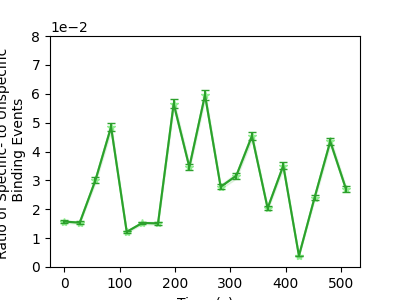

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [153]:
plt.figure(figsize = (4,3))
# plt.figure()

plt.plot(x_wt_force, y_wt_ratio, '*-',color = 'lightgreen',label='T7 wt-gp2.5')
plt.fill_between(x_wt_force, y_wt_ratio - y_wt_ratio_error, y_wt_ratio + y_wt_ratio_error,alpha=0.1, color='tab:green')
plt.errorbar(x_wt_force, y_wt_ratio, y_wt_ratio_error, color='tab:green', ecolor='tab:green',
             capsize=3, linewidth=1.5)

# plt.plot(x_mut_force, y_mut_ratio, '-^',color = 'tomato',label='T7 gp2.5-ΔC26')
# plt.fill_between(x_mut_force, y_mut_ratio - y_mut_ratio_error, y_mut_ratio + y_mut_ratio_error,alpha=0.1, color='tab:red')
# plt.errorbar(x_mut_force, y_mut_ratio, y_mut_ratio_error, color='tab:red', ecolor='tab:red',
#              capsize=3, linewidth=1.5)

# plt.ylim(0,0.02)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.xlim(0,20)
# plt.xticks(x_wt_force,[3,6,12,18])
# plt.yscale('log')
plt.ylim(0,0.08)
plt.xlabel('Time (s)')
plt.ylabel('Ratio of Specific- to Unspecific \n Binding Events')

# plt.legend(loc ='upper left')
plt.show()
plt.tight_layout()
plt.savefig(file[:-5]+ 'Ratio of Specific- to Unspecific-Binding Events ' +'.png', dpi=300)
plt.savefig(file[:-5]+ 'Ratio of Specific- to Unspecific-Binding Events ' +'.eps', format='eps')